In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
file_url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df1 = pd.read_csv(file_url)
# display(df1)

print(df1.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
import math

class PlainPlot:
    def __init__(self, df, yName, xNames=None, FIGSIZE=(16,10), HSPACE=0.4, WSPACE=0.4, MAXWIDTH=4):
        self.FIGSIZE = FIGSIZE
        self.HSPACE = HSPACE
        self.WSPACE = WSPACE
        self.MAXWIDTH = MAXWIDTH

        self.yName = yName
        self.xNames = xNames if xNames is not None else [column for column in df.columns if column != yName]
        self.df = df
        self.funcs = {
            "identity": lambda x: x
        }
    
    def plotAllGraphs(self, xNames=None, funcNames=None):
        fig = plt.figure(figsize=self.FIGSIZE)
        fig.subplots_adjust(hspace=self.HSPACE, wspace=self.WSPACE)
        if xNames is None:
            xNames = self.xNames
        if funcNames is None:
            funcNames = self.funcs.keys()
        
        count = 0
        for i, xName in enumerate(xNames):
            for j, name in enumerate(funcNames):
                count += 1
                w = min(len(xNames), self.MAXWIDTH)
                h = max(1, (len(xNames)*len(funcNames) // w)+1)
                subplotParams = (h, w, count)
                func = self.funcs[name]
                self.plotGraph(xName, func, name, fig, subplotParams)
        plt.show()
    
    def plotGraph(self, xName, func, funcName, fig, subplotParams):
        currData = pd.DataFrame(self.df[xName].apply(func))

        df = currData.join(self.df[self.yName])
        
        ax = fig.add_subplot(*subplotParams)
        sns.scatterplot(
            data=df,
            y=self.yName,
            x=xName
        ).set(
            ylabel=self.yName,
            xlabel=xName
        )

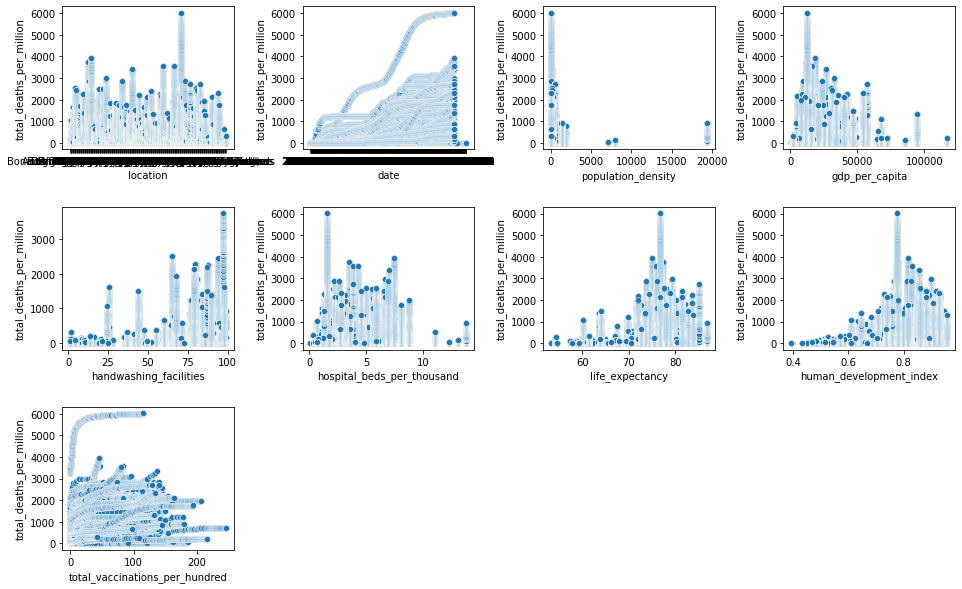

In [44]:
pd.reset_option("display.max_rows")
#total_deaths_per_million
columnsOfInterest = ['location', 'date', 'total_deaths_per_million',
                     'population_density', 'gdp_per_capita',
                     'handwashing_facilities', 'hospital_beds_per_thousand',
                     'life_expectancy', 'human_development_index', 'total_vaccinations_per_hundred']

af = df1.loc[df1["location"] == "Afghanistan"]
df1_interest = df1.loc[:, columnsOfInterest]
q = PlainPlot(df1_interest, "total_deaths_per_million")
q.plotAllGraphs()

In [15]:


countryNames = pd.unique(df1["location"])
countryDFList = [df1.loc[df1["location"] == country] for country in countryNames]
countryDict = dict(zip(countryNames, countryDFList))

missingFactorsByCountry = {}
for countryName, countryDF in countryDict.items():
    temp = {}
    for targetColumn in countryDF.columns[countryDF.isnull().any()]:
        if targetColumn in columnsOfInterest:
            temp[targetColumn] = countryDF[targetColumn].isna().sum()
    missingFactorsByCountry[countryName] = temp
    
numberOfCountriesMissingFactors = {}
for country, missingDict in missingFactorsByCountry.items():
    for factor in missingDict.keys():
        if numberOfCountriesMissingFactors.get(factor, None) is None:
            numberOfCountriesMissingFactors[factor] = 1
        else:
            numberOfCountriesMissingFactors[factor] += 1

filledNANDict = {}
for countryName, countryDF in countryDict.items():
    filledNANDict[countryName] = {}
    filledNANDict[countryName]["ffill"] = countryDF.fillna(method="ffill")
    filledNANDict[countryName]["ffill->0"] = filledNANDict[countryName]["ffill"].fillna(0)

resList = [filledNANDict[countryName]["ffill->0"] for countryName in countryDict.keys()]
resMerged = pd.concat(resList).reset_index()
#resMerged.to_csv(r'C:\Users\drago\2DRandomCSVs\export_dataframe.csv', index = False, header=True)
resMerged
#######################################################################################
# DANGEROUS, DO NOT DO -- COUNTRIES WILL HAVE VALUES PROPAGATED FROM PREVIOUS COUNTRIES
# df1_featuresFilledNAN1 = df1_features.fillna(method="ffill")
# df1_featuresFilledNAN2 = df1_featuresFilledNAN1.fillna(0)
#######################################################################################

,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.000,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.000,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134665,134665,ZWE,Africa,Zimbabwe,2021-11-16,133505.0,67.0,37.571,4698.0,1.0,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
134666,134666,ZWE,Africa,Zimbabwe,2021-11-17,133557.0,52.0,36.429,4699.0,1.0,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
134667,134667,ZWE,Africa,Zimbabwe,2021-11-18,133593.0,36.0,37.714,4699.0,0.0,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
134668,134668,ZWE,Africa,Zimbabwe,2021-11-19,133593.0,0.0,37.714,4699.0,0.0,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0


In [25]:
class LinearRegression:
    def __init__(self, name, df, yName, xNames, learningIncrement, numIter, transformDict=None):
        self.name = name
        self.df = df
        self.yName = yName
        self.xNames = xNames
        self.learningIncrement = learningIncrement
        self.numIter = numIter
        self.transformDict = transformDict

        self.initMatrices()

        self.bestFitY = None
        self.latestTestResult = None
        self.bsHistory = []
        self.costHistory = []
    
    def prepareFeatures(self, df_features):
        res = df_features.to_numpy()
        res = np.insert(res, 0, 1, axis=1)
        return res

    def initBs(self):
        self.bs = np.ones((self.xs.shape[1], 1))

    def transform(self):
        for columnName, func in self.transformDict.items():
            if columnName == self.yName:
                self.y = np.apply_along_axis(func, 0, self.y)
            elif columnName in self.xNames:
                index = self.xNames.index(columnName)+1 # weird +1 because of initial column of rows
                self.xs = np.insert(self.xs, index+1, np.apply_along_axis(func, 0, self.xs[:, index]), axis = 1)
                self.initBs()
            else:
                raise ValueError("Column name unrecognized!")        

    def initMatrices(self):
        self.xs = self.df[self.xNames]
        self.xs = self.prepareFeatures(self.xs)
        self.y = self.df[[self.yName]].to_numpy()
        self.initBs()
        self.transform()
    
    def performRegression(self):
        def compute_cost():
            yHat = np.matmul(self.xs, self.bs)
            m = self.y.shape[0]
            cost = (1/(2*m)) * sum(
                np.matmul(
                    (yHat-self.y).transpose(),
                    (yHat-self.y)
                )
            )
            return cost
        def incrementBs():
            return self.bs - self.learningIncrement*(1/len(self.xs))*(np.matmul(
                self.xs.transpose(),
                np.matmul(
                    self.xs,
                    self.bs
                ) - self.y
            ))

        for _ in range(self.numIter):
            self.costHistory.append(compute_cost())
            self.bsHistory.append(self.bs)
            self.bs = incrementBs()
        self.bestFitY = np.matmul(self.xs, self.bs)
 
    def prepareTestSection(self, testSection):
        cols = list(testSection.columns)
        testSection_features = testSection[self.xNames]
        testSection_features = self.prepareFeatures(testSection_features)
        for columnName, func in self.transformDict.items():
            index = cols.index(columnName)+1
            testSection_features = np.insert(testSection_features, index+1, np.apply_along_axis(func, 0, testSection_features[:, index]), axis = 1)
        return testSection_features
    
    def predict(self, testSection):
        testSection = self.prepareTestSection(testSection)
        return np.matmul(testSection, self.bs)

    def getHistories(self):
        return self.bsHistory, self.costHistory
    
    def getJoinedDF(self):
        res = self.df.copy().join(
            pd.Series(self.bestFitY.copy().flatten(), name="BESTFITLINE")
        )
        return res

[array([[1.],
       [1.]]), array([[ 9.90518995e-01],
       [-3.18186768e+03]]), array([[1.14898053e+03],
       [1.03964636e+07]]), array([[-3.74865735e+06],
       [-3.39692211e+10]]), array([[1.22483033e+10],
       [1.10990432e+14]]), array([[-4.00198897e+13],
       [-3.62648175e+17]]), array([[1.30760280e+17],
       [1.18491023e+21]]), array([[-4.27243825e+20],
       [-3.87155473e+24]]), array([[1.39596892e+24],
       [1.26498495e+28]]), array([[-4.56116415e+27],
       [-4.13318944e+31]])]
         BESTFITLINE  total_deaths_per_million
0       7.349548e+36                     0.000
1       7.349548e+36                     0.000
2       7.349548e+36                     0.000
3       7.349548e+36                     0.000
4       7.349548e+36                     0.000
...              ...                       ...
134665  5.770442e+36                   311.287
134666  5.770442e+36                   311.353
134667  5.770442e+36                   311.353
134668  5.770442e+36   

<AxesSubplot:xlabel='total_deaths_per_million', ylabel='BESTFITLINE'>

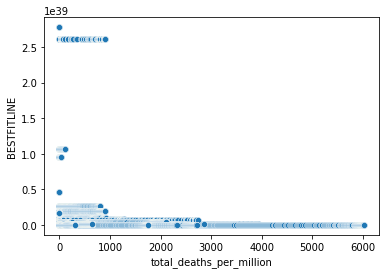

In [47]:
columnsOfInterest = ['total_deaths_per_million', 'population_density']

featureColumns = [column for column in columnsOfInterest if column != "total_deaths_per_million"]
af = df1.loc[df1["location"] == "Afghanistan"]
df1_interest = df1.loc[:, columnsOfInterest]

rgs = LinearRegression("test", resMerged, "total_deaths_per_million", featureColumns, 0.001, 10, {
    
})
rgs.performRegression()
df_BFL = rgs.getJoinedDF()
print(rgs.bsHistory)
print(df_BFL[["BESTFITLINE", "total_deaths_per_million"]])

sns.scatterplot(
    data=df_BFL,
    y="BESTFITLINE",
    x="total_deaths_per_million"
)

In [8]:
pd.concat((df1_featuresFilledNAN1, df1_featuresFilledNAN2)).drop_duplicates(keep=False)

NameError: name 'df1_featuresFilledNAN1' is not defined

In [ ]:
pd.set_option("display.max_rows", 1000)
display(
    pd.concat((filledNANDict["Uganda"]["ffill"], filledNANDict["Uganda"]["ffill->0"])).drop_duplicates(keep=False)
)

In [ ]:
resMerged